In [88]:
import keras
import random
import collections
import numpy as np
import matplotlib.pyplot as plt

import tensorflow
def display_random_images_with_labels(d, n=10):
    """
        accept dataset in tuple form, first index
        is np arrays (images) and second is labels
        and display n random images with labels
        from it
        Inputs:
            d (tuple): dataset images, dataset labels on same indexs
            n (int): number of samples to display (default: 10)
        Output:
            None
    """
    choices = list(range(len(d[0])))
    for i in range(n):
        index = random.choice(choices)
        choices.remove(index)
        print("index:",index)
        print("Lable:",d[1][index])
        plt.imshow(d[0][index], cmap='gray')
        plt.show()


In [89]:
# Loading dataset
dataset = tensorflow.keras.datasets.mnist.load_data()

In [ ]:


# Description of dataset

# mnint is handwritten digits (0 to 9) images dataset
# keras.datasets.mnist.load_data() loads those images in gray scale as cv2 images / np arrays
# with those labels


# dataset is in tuple form,
# its first index dataset[0] represents training dataset
# its second index dataset[1] represents testing dataset

# Both training (dataset[0]) and testing (dataset[1]) datasets
# are further tuples and have two elements,

# first element of both training and testing (dataset[0][0] and dataset[0][0])
# represnts images in numpy arrays
print("There are",len(dataset[0][0]),"images in training dataset")
print("There are",len(dataset[1][0]),"images in training dataset")
print("___________________\n\n")
# Each image is of shape 28x28
# print(dataset[0][0][0].shape)
# print("___________________")


# second element of both training and testing (dataset[0][1] and dataset[0][1])
# represnts labels of the images, presents on the same index in images
# For example dataset[0][0][0] is an image in training dataset
# and dataset[0][1][0] is the label of same image is training dataset
print("Randomly printing 10 images with labels from training dataset")
display_random_images_with_labels(dataset[0])
print("___________________\n\n")
print("Randomly printing 10 images with labels from testing dataset")
display_random_images_with_labels(dataset[0])
print("___________________\n\n")

print("There are",len(dataset[0][1]),"labels in training dataset for",len(dataset[0][0]),"images in training dataset")
print("There are",len(dataset[1][1]),"labels in training dataset for",len(dataset[1][0]),"images in training dataset")
print("___________________\n\n")

print("There are", len(set(dataset[0][1])),"unique classes in training dataset")
print("Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)")
display(collections.Counter(dataset[0][1]))
print("There are", len(set(dataset[1][1])),"unique classes in validation dataset")
print("Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)")
display(collections.Counter(dataset[1][1]))
print("___________________\n\n")





In [90]:
len(dataset[0]),len(dataset[1])

(2, 2)

In [91]:
# training
# dataset[0]

In [92]:
# testing
# dataset[1]

In [93]:
# images in training
dataset[0][0].shape

(60000, 28, 28)

In [94]:
# labels in training
dataset[0][1].shape

(60000,)

In [95]:
# first image in training dataset
dataset[0][0][0].shape

(28, 28)

In [96]:
# first label in training dataset
dataset[0][1][0].shape

()

In [97]:
# Unique classes
len(set(dataset[0][1]))

10

In [98]:
import tensorflow as tf

In [99]:
# training dataset
train_images  = dataset[0][0]
train_labels = dataset[0][1]

# testing dataset
test_images = dataset[0][0]
test_labels = dataset[0][1]

# Loading the dataset (we can load the dataset by this method)
# we have
# >> train_dataset
#     >> images
#     >> labels
# >> test_dataset
#     >> images
#     >> labels
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [109]:
def train_reduce():
    # select the 600 from each class
    SAMPLES = 600

    # selected images and labels
    selected_train_images = []
    selected_train_labels = []

    # for each class (0-9)
    for label in range(10):
        # indices where class occur
        indices = np.where(train_labels == label)[0]

        # shuffle the indices
        np.random.shuffle(indices)

        # indices (first 600)
        selected_indices = indices[:SAMPLES]

        # selected images append to list
        selected_train_images.append(train_images[selected_indices])
        selected_train_labels.append(train_labels[selected_indices])

    # concatenate all the result and make an array
    selected_train_images = np.concatenate(selected_train_images, axis=0)
    selected_train_labels = np.concatenate(selected_train_labels)


    # again shuffle the indices
    indices_ = np.arange(len(selected_train_labels))
    np.random.shuffle(indices_)

    selected_train_images = selected_train_images[indices_]
    selected_train_labels = selected_train_labels[indices_]

    # # Here is our result
    # print("New Data Set Shape:")
    # print("Images:", selected_train_images.shape)
    # print("Labels:", selected_train_labels.shape)
    return selected_train_images,selected_train_labels

In [117]:
np.where(test_labels == 1)[0]

array([   2,    5,   14, ..., 9978, 9984, 9994], dtype=int64)

In [110]:
def test_reduce():
    # select the 100 from each class
    SAMPLES = 100

    # selected images and labels
    selected_test_images = []
    selected_test_labels = []

    # for each class (0-9)
    for label in range(10):
        # indices where class occur
        indices = np.where(test_labels == label)[0]

        # shuffle the indices
        np.random.shuffle(indices)

        # indices (first 100)
        selected_indices = indices[:SAMPLES]

        # selected images append to list
        selected_test_images.append(test_images[selected_indices])
        selected_test_labels.append(test_labels[selected_indices])

    # concatenate all the result and make an array
    selected_test_images = np.concatenate(selected_test_images, axis=0)
    selected_test_labels = np.concatenate(selected_test_labels)


    # again shuffle the indices
    indices_ = np.arange(len(selected_test_labels))
    np.random.shuffle(indices_)

    selected_test_images = selected_test_images[indices_]
    selected_test_labels = selected_test_labels[indices_]

    # # Here is our result
    # print("New Data Set Shape:")
    # print("Images:", selected_test_images.shape)
    # print("Labels:", selected_test_labels.shape)

    return selected_test_images,selected_test_labels

In [113]:
new_dataset = train_reduce(),test_reduce()
new_dataset[0][0].shape

(6000, 28, 28)

(28, 28)
___________________
There are 6000 labels in training dataset for 6000 images in training dataset
There are 1000 labels in training dataset for 1000 images in training dataset
___________________


There are 10 unique classes in training dataset
Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)


Counter({6: 600,
         4: 600,
         7: 600,
         9: 600,
         0: 600,
         2: 600,
         8: 600,
         3: 600,
         1: 600,
         5: 600})

There are 10 unique classes in validation dataset
Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)


Counter({4: 100,
         5: 100,
         0: 100,
         6: 100,
         7: 100,
         3: 100,
         2: 100,
         1: 100,
         8: 100,
         9: 100})

___________________


Randomly printing 10 images with labels from training dataset
index: 4950
Lable: 8


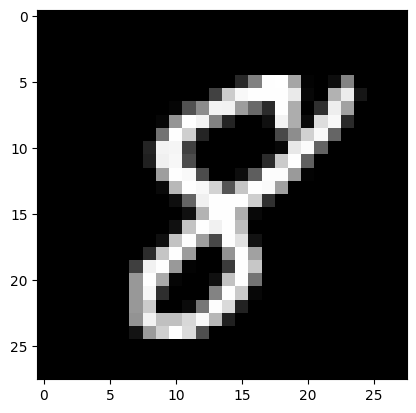

index: 370
Lable: 2


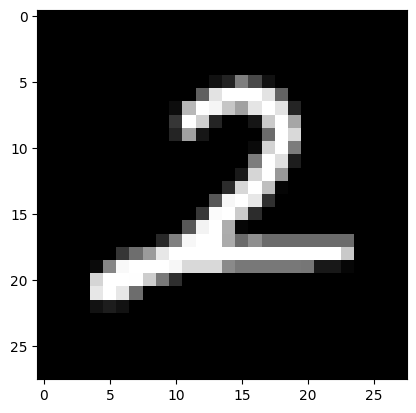

index: 3111
Lable: 5


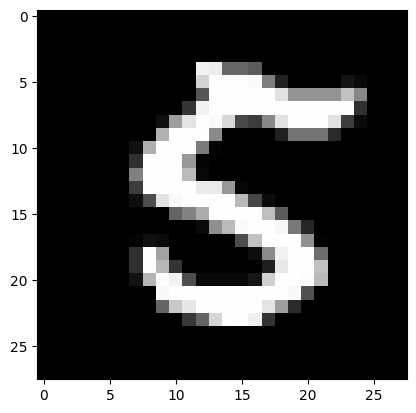

index: 4945
Lable: 1


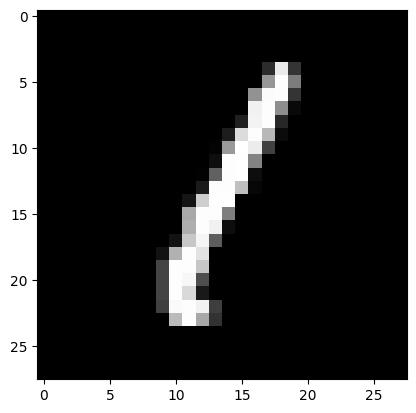

index: 4144
Lable: 1


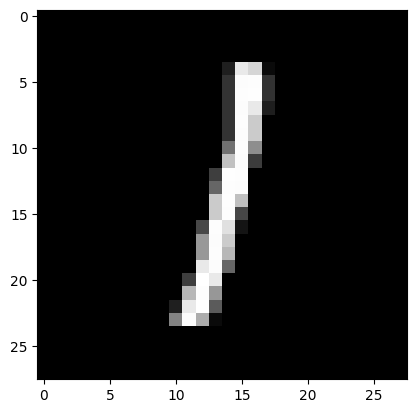

index: 595
Lable: 1


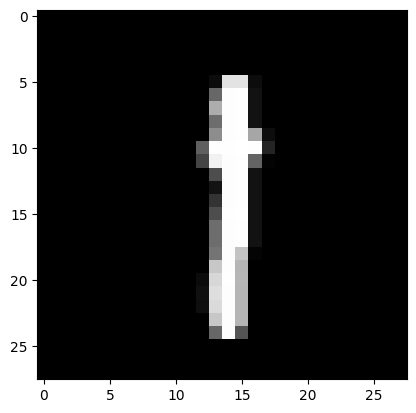

index: 5925
Lable: 1


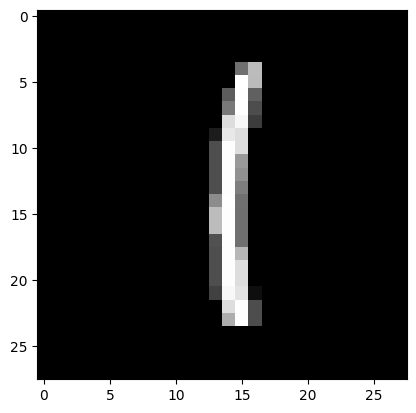

index: 5429
Lable: 1


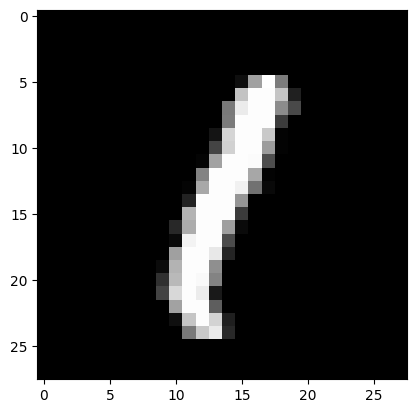

index: 2361
Lable: 2


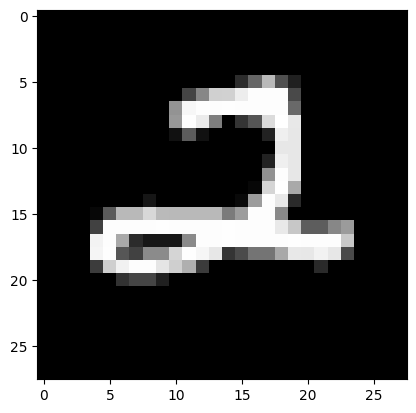

index: 5374
Lable: 0


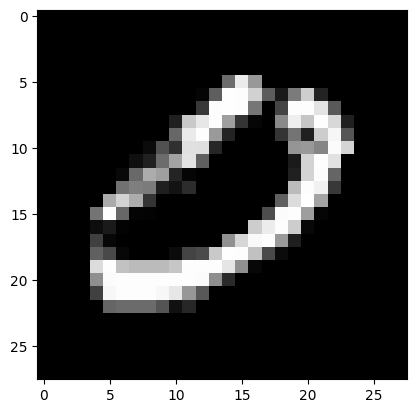

___________________


Randomly printing 10 images with labels from testing dataset
index: 262
Lable: 2


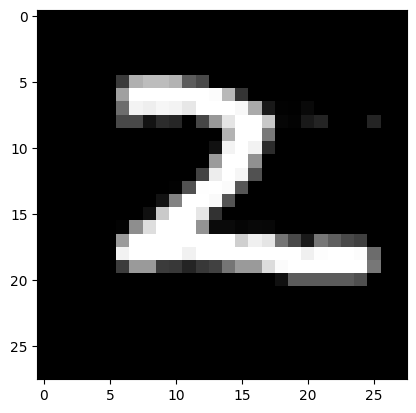

index: 2584
Lable: 0


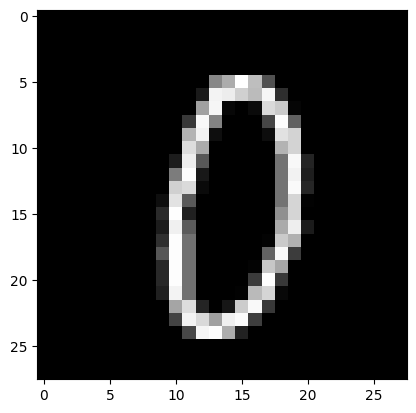

index: 1754
Lable: 6


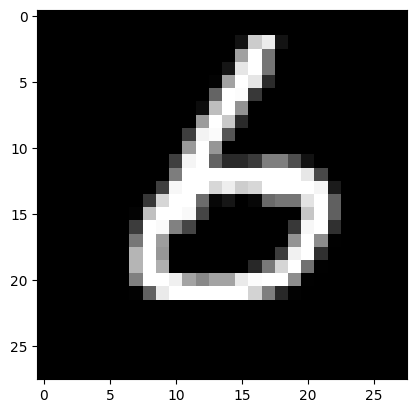

index: 2500
Lable: 1


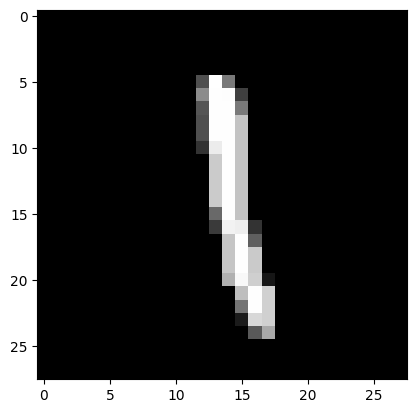

index: 3950
Lable: 1


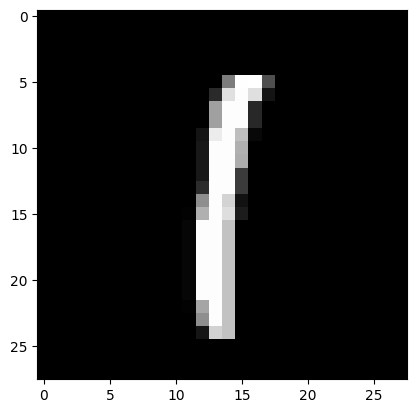

index: 3480
Lable: 7


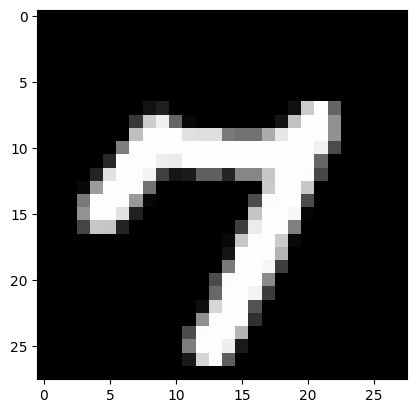

index: 4869
Lable: 9


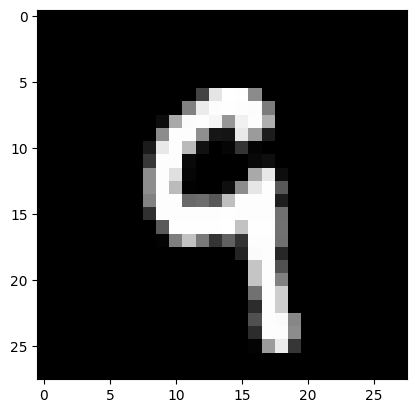

index: 787
Lable: 7


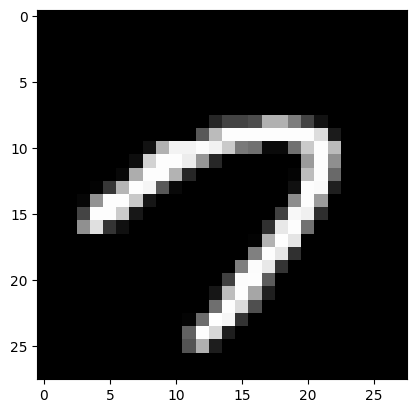

index: 217
Lable: 8


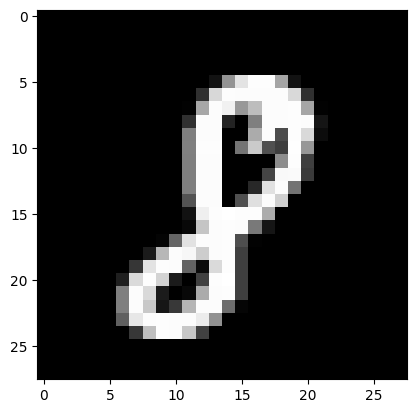

index: 5414
Lable: 0


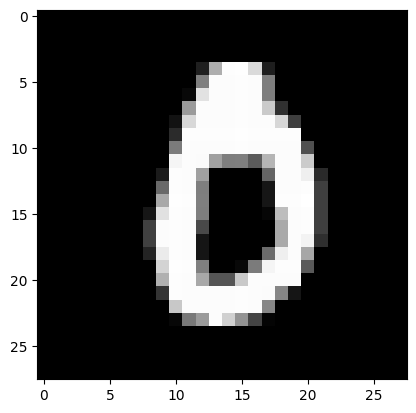

___________________




In [114]:
new_dataset = train_reduce(),test_reduce()

# Checking the shape of first image in new training dataset
print(new_dataset[0][0][0].shape)
print("___________________")


# Checking the size of dataset
print("There are",len(new_dataset[0][1]),"labels in training dataset for",len(new_dataset[0][0]),"images in training dataset")
print("There are",len(new_dataset[1][1]),"labels in training dataset for",len(new_dataset[1][0]),"images in training dataset")
print("___________________\n\n")
# Excepted output
# There are 6000 labels in training dataset for 6000 images in training dataset
# There are 1000 labels in training dataset for 1000 images in training dataset




# Checking the number of images per class
print("There are", len(set(new_dataset[0][1])),"unique classes in training dataset")
print("Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)")
display(collections.Counter(new_dataset[0][1]))
print("There are", len(set(new_dataset[1][1])),"unique classes in validation dataset")
print("Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)")
display(collections.Counter(new_dataset[1][1]))
print("___________________\n\n")
# Expected output
# There are 10 unique classes in training dataset
# Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)
# Counter({0: 600,
#          1: 600,
#          2: 600,
#          3: 600,
#          4: 600,
#          5: 600,
#          6: 600,
#          7: 600,
#          8: 600,
#          9: 600})
# There are 10 unique classes in validation dataset
# Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)
# Counter({0: 100,
#          1: 100,
#          2: 100,
#          3: 100,
#          4: 100,
#          5: 100,
#          6: 100,
#          7: 100,
#          8: 100,
#          9: 100})


# Checking the correctness of indexing of image and its labels
print("Randomly printing 10 images with labels from training dataset")
display_random_images_with_labels(new_dataset[0])
print("___________________\n\n")
print("Randomly printing 10 images with labels from testing dataset")
display_random_images_with_labels(new_dataset[0])
print("___________________\n\n")